Most number of Attacks and Proportion of People Died

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt

pk = pd.read_csv('input/PakistanDroneAttacks.csv', encoding='latin1')
pk.head()

,S#,Date,Time,Location,City,Province,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Total Died Min,Total Died Mix,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude
0,1.0,"Friday, June 18, 2004",22:00,Near Wana,south Waziristan,FATA,NaN,1.0,0.0,4.0,...,NaN,5.0,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333
1,2.0,"Sunday, May 08, 2005",23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,NaN,0.0,1.0,...,NaN,2.0,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746
2,3.0,"Thursday, December 01, 2005",NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,NaN,0.0,1.0,...,NaN,5.0,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746
3,4.0,"Friday, January 06, 2006",NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746
4,5.0,"Friday, January 13, 2006",3:00,Damadola Village,Bajaur Agency,FATA,NaN,NaN,0.0,18.0,...,NaN,18.0,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833


In [2]:
pk.groupby(["Longitude", "Latitude"]).size()

Longitude  Latitude 
28.896179  64.399215      1
32.320237  69.859741      2
32.844444  69.830556      3
32.905167  69.748798      1
33.695975  70.336069      1
68.502350  25.678480      1
69.859700  32.667400      1
69.900000  33.033300     92
69.966700  33.816700      3
70.145500  32.974600    279
70.604200  32.986100      3
71.060000  33.530000      1
71.148100  34.098300      5
71.500000  34.683300      4
dtype: int64

We can clearly see that, the most number of attacks occurred in two locations.
Now let see the proportion of NaNs in each column.

In [11]:
plt.figure(figsize=(5, 20))
pk.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

In [4]:
pk.groupby(["Date","Time"]).size()

Date                           Time 
Friday, April 22, 2011         5:45     1
Friday, August 27, 2010        11:30    1
Friday, December 10, 2010      17:45    1
Friday, December 18, 2009      15:30    1
                               3:50     1
Friday, December 21, 2012      12:15    1
Friday, December 31, 2010      23:30    1
Friday, January 01, 2010       8:50     1
Friday, January 02, 2009       10:00    1
Friday, January 08, 2010       10:00    1
Friday, January 13, 2006       3:00     1
Friday, January 23, 2009       17:00    1
Friday, July 03, 2009          6:30     1
Friday, July 06, 2012          20:45    1
                               22:30    1
Friday, July 17, 2009          16:00    1
Friday, June 03, 2011          23:45    1
Friday, June 11, 2010          7:30     1
Friday, June 18, 2004          22:00    1
Friday, March 30, 2012         3:00     1
Friday, May 20, 2011           18:00    1
Friday, May 28, 2010           12:00    1
Friday, November 07, 2008      10:00   

Replacing Nan with -1 and drop the columns which are not useful.

In [5]:
pk.drop(["Comments", "References", "Special Mention (Site)"], 1, inplace = True)
pk.columns = map(lambda x: x.replace(".", "").replace("_", ""), pk.columns)
pk.fillna(value = -1, inplace = True)

In [6]:
print(pk.shape)
print(pk.dtypes)
print(pk.head(10))

(398, 19)
S#                  float64
Date                 object
Time                 object
Location             object
City                 object
Province             object
Al-Qaeda            float64
Taliban             float64
Civilians Min       float64
Civilians Max       float64
Foreigners Min      float64
Foreigners Max      float64
Total Died Min      float64
Total Died Mix      float64
Injured Min         float64
Injured Max         float64
Women/Children       object
Longitude           float64
Latitude            float64
dtype: object
     S#                         Date   Time  \
0   1.0        Friday, June 18, 2004  22:00   
1   2.0         Sunday, May 08, 2005  23:30   
2   3.0  Thursday, December 01, 2005     -1   
3   4.0     Friday, January 06, 2006     -1   
4   5.0     Friday, January 13, 2006   3:00   
5   6.0     Monday, October 30, 2006     -1   
6   7.0       Friday, April 27, 2007     -1   
7   8.0       Tuesday, June 19, 2007  10:30   
8   9.0    Friday, No

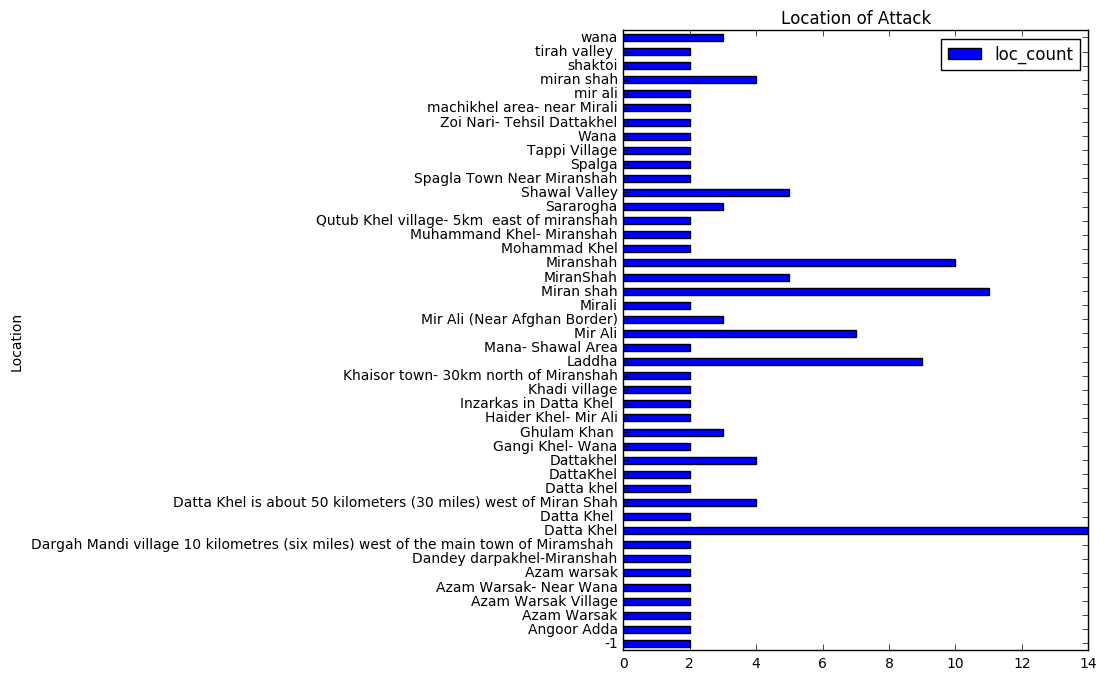

In [9]:
df_loc_count = pk.groupby('Location')[['City']].count()
df_loc_count.columns = ['loc_count']
df_bc = df_loc_count.ix[df_loc_count.loc_count>1,:]
df_bc.plot.barh(title='Location of Attack', legend=True, figsize=(6,8))
plt.show()

Now, the proportion of people died in an attack.

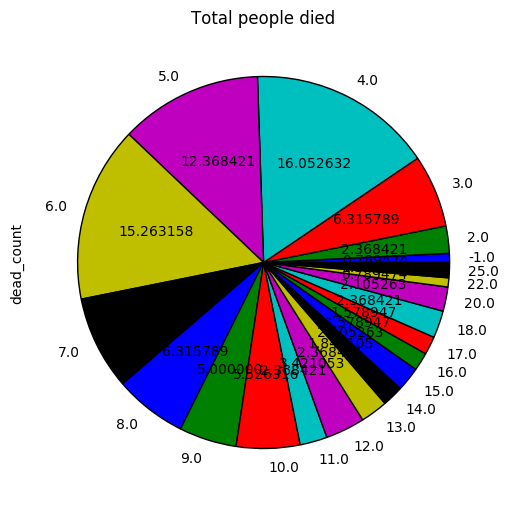

In [8]:
df_dead = pk.groupby('Total Died Mix')[['Location']].count()
df_dead.columns = ['dead_count']
df_maxdead = df_dead.ix[df_dead.dead_count>2,:]
df_maxdead.plot.pie(y='dead_count', autopct='%2f', title='Total people died',legend=False ,figsize=(6,6)) 
plt.show()